In [1]:
#Import fits data cube

import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits

filename = 'L1641N_N2H+_feathered_final.fits'
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header).celestial

#Save fits information in giant array image_data
image_data = hdu.data

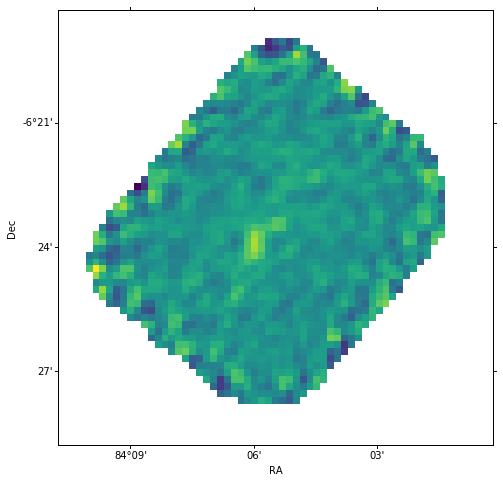

In [2]:
#plot the fits cubes. image_data[0,vel,dec]=I, len(image_data)=RA
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111,projection=wcs)
ax.coords[0].set_ticks(exclude_overlapping=True)
#Find out vel size and dec size
ax.imshow(image_data[150,:])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.gca().invert_yaxis()

plt.show()

In [3]:
#Add intensities at different velocity limits

import numpy as np

#Read the intensity values between these two velocity points 
velarr=np.arange(0,300)
declim=62

AvgSpec=np.zeros((63,63))
for i in range(300):
    AvgSpec=AvgSpec+image_data[i,:]


###########################
Avg2D = np.zeros((declim,len(image_data[0,0,0])))
tmp = np.zeros((declim,len(image_data[0,0,0])))

for vel in velarr:
    for dec in range(declim):
        tmp[dec][:]=image_data[0,vel,dec]
    Avg2D = Avg2D + tmp

Avg2D = Avg2D/len(velarr)


TypeError: object of type 'numpy.float32' has no len()

In [4]:
#Save new avg integrated intensity in image_data @ vel=0
image_data[0,0,:]=Avg2D[:,:]

NameError: name 'Avg2D' is not defined

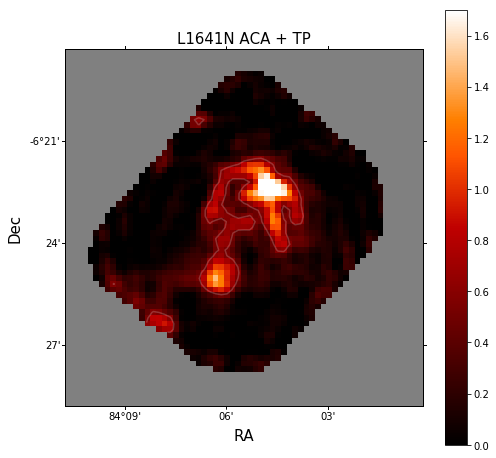

In [38]:
#plot the fits cubes. image_data[0,vel,dec]=I, len(image_data)=RA
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111,projection=wcs)
ax.coords[0].set_ticks(exclude_overlapping=True)
#ims=ax.imshow(image_data[0, 0, :])
ims=ax.imshow(AvgSpec/300,vmin=0,vmax=1.7,cmap='gist_heat')
ax.contour(AvgSpec/300,levels=[.55], colors='white', alpha=0.2)
plt.xlabel('RA',fontsize='15')
plt.ylabel('Dec',fontsize='15')
plt.title('L1641N ACA + TP',fontsize='15')
plt.gca().invert_yaxis()
ax.set_facecolor('gray')

cb = plt.colorbar(mappable=ims)
cb.ax.yaxis.set_label_position('right')

plt.show()

In [10]:
hdu.data = image_data

In [11]:
#Write this to a new file
hdu.writeto('./My_ALMA_Comb/featheredavg3.fits')

Adding two fits files:

In [8]:
filename1 = './My_ALMA_N2H+/L1641N_test_one.fits'
filename2 = './My_ALMA_N2H+/L1641N_test_two.fits'
hdu1 = fits.open(filename1)[0]
hdu2 = fits.open(filename2)[0]
wcs1 = WCS(hdu1.header).celestial
wcs2 = WCS(hdu2.header).celestial

#Save fits information in giant array image_data
image_data1 = hdu1.data
image_data2 = hdu2.data

In [9]:
avg_data=image_data1[0,0,:]+image_data2[0,0,:]


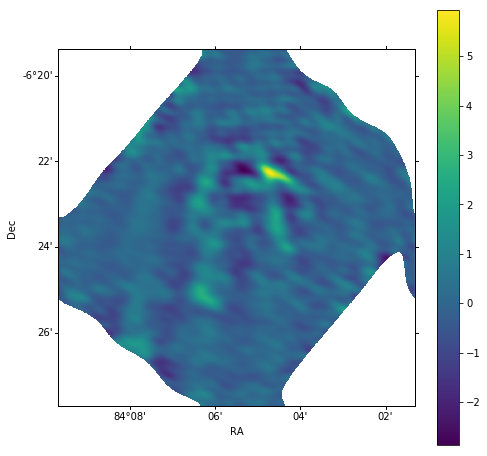

In [12]:
#plot the fits cubes. image_data[0,vel,dec]=I, len(image_data)=RA
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111,projection=wcs)
ax.coords[0].set_ticks(exclude_overlapping=True)
ims=ax.imshow(avg_data[:,:])
#ax.contour(image_data[0,0,:],levels=[.5,1,1.5], colors='white', alpha=0.5)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.gca().invert_yaxis()

cb = plt.colorbar(mappable=ims)
cb.ax.yaxis.set_label_position('right')

plt.show()

In [14]:
hdu1.data = avg_data
#Write this to a new file
hdu1.writeto('./My_ALMA_N2H+/L1641N_test_comb.fits')